# The Canonical Ensemble



### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

We introduced the idea of the "microcanonical ensemble", where the total energy of a system is fixed, and we draw conclusions about the behavior of the system (or subparts of it) using the principle of indifference.  This led us to introduce the number of accessible states $\Omega(E)$, the entropy $S = k_B \ln \Omega$, and the temperature $T = (\partial S/\partial E)^{-1}$.  We determined that the condition for thermal equilibrium between two systems that can exchange energy is that their temperatures should be the same.

In many situations we have some "small" system (1) in contact with a large heat reservoir (2).  We assume that we can keep the large reservoir at a constant temperature $T$.  Now the key thing is that we do not want to have to worry about the details of the reservoir, in particular we do not want to know details about the number of states function $\Omega_2(E_2)$ for the reservoir. Can we still draw conclusions?

Considering a possible state of system 1 at energy $E_1$, the probability that the combined systems 1+2 with total energy $E$ will be in that state is proportional to the number of available states for system 2, i.e. $\Omega_2(E-E_1)$. Therefore two different states of system 1 with the same energy $E_1$ will be equally probable, and the relative probability of two different states of system 1 with energies $E_1$ and $E'_1$ will be $\Omega_2(E-E_1)/\Omega_2(E-E_2)$. If we know $\Omega_2$ then things are easy. But what if we don't?  We are able to make an approximation.

Just for a moment, let's consider linearizing $\Omega_2$, i.e. finding a Taylor expansion around an equilibrium energy $\bar E_2$. In general, for a large system, $\Omega_2$ will be proportional to $E^N$ where $N$ is a very large number; therefore a linear tangent is not a great approximation to $\Omega_2$.  We will actually do much better as an approximation if we instead Taylor expand $\ln \Omega_2$, which is typically proportional to $N \ln E$:

$$
\begin{align*}
\Omega_2(E_2) = \exp \ln \Omega_2(E_2) &\approx \exp\left[\ln\Omega_2(\bar E_2) + \left.\frac{\partial \ln \Omega_2}{\partial E}\right|_{E=\bar E_2}(E_2-\bar E_2)\right] \\
&= \exp\left[\ln\Omega_2(\bar E_2) + \frac{E_2-\bar E_2}{k_B T}\right]
\end{align*}
$$

since we know $1/T = \partial [k_B \ln \Omega]/\partial E$. Therefore

$$ \Omega_2(E_2) \approx \Omega_2(\bar E_2) \exp[(E_2-\bar E_2)/k_B T] $$

Let's set $\bar E_1 = E - \bar E_2$; then the probability of a specific state of system 1 of energy $E_1$ follows

$$\begin{align*}
p \propto \Omega_2(E-E_1) &= \Omega_2(E-(E_1-\bar E_1 + \bar E_1)) \\
&= \Omega_2((E-\bar E_1)-(E_1-\bar E_1)) \\
&= \Omega_2(\bar E_2) - (E_1-\bar E_1)) \\
&\approx \Omega_2(\bar E_2) \exp[-(E_1-\bar E_1)/k_B T]\\
& = \Omega_2(\bar E_2) \exp(\bar E_1/k_B T) \exp(-E_1/k_B T)
\end{align*}
$$

Now, interestingly, $\Omega_2(\bar E_2) \exp(\bar E_1/k_B T)$ is a constant, so we can remove it from the proportionality without having an effect.  We conclude that the probability of seeing a specific state of system 1 with energy $E_1$ follows

$$ p \propto \exp(-E_1/k_B T) $$

We can get the exact probability by dividing by the sum of the exponential term over all possible states, i.e.

$$ p_i = \frac{\exp(-E_i/k_B T)}{\sum_{j\in\mathrm{states}} \exp(-E_j/k_B T)} $$

We call this approximation the _canonical ensemble_. To evaluate some property of system 1, we consider all possible states of system 1, but consider that they appear with probability proportional to $\exp(-E_1/k_B T)$, rather than equal probability (as for the microcanonical ensemble).

Let's examine the equivalence of the microcanonical and canonical ensembles in a system of 5 spins coupled to 195 spins, with total energy $-150\mu B$. First, let's run the microcanonical ensemble and determine the probability of seeing various values of energy in the 5-spin system:

In [303]:
# TACC: install if necessary
! pip3 install --user numba
INSTALL_PATH='/home/jupyter/mydata/jupyter_packages/lib/python3.6/site-packages'
import sys, os
if os.access(INSTALL_PATH, os.R_OK) and INSTALL_PATH not in sys.path:
    sys.path.insert(0, INSTALL_PATH)

In [4]:
# import Python packages
import numpy
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60
import math
import tqdm.notebook
from IPython.display import YouTubeVideo, HTML
from matplotlib import animation
# for binomial coefficients
import scipy.special
import random
import numba

Temperature is: 1.04


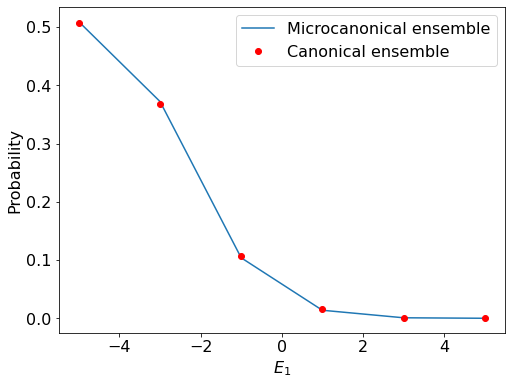

In [23]:
# Plot probability of observing various values of E_1 from microcanonical ensemble
# Probability = omega_1 * omega_2 / omega_total
# for numerical stability, evaluate exp [ ln omega_1 + ln omega_2 - ln omega_total ]
N_1 = 5
N_2 = 195
N = N_1+N_2

# E is in units of mu B
def omega(N, E):
    Nup = (N - E)/2
    return scipy.special.binom(N, Nup)

# energy steps by 2
E1 = numpy.arange(-N_1, N_1+1, 2)
Etotal = -150

# this will be correctly normalized out of the box
probs_microcanonical = numpy.exp(numpy.log(omega(N_1, E1)) + numpy.log(omega(N_2, Etotal-E1)) - numpy.log(omega(N, Etotal)))

plt.plot(E1, probs_microcanonical, label='Microcanonical ensemble')

# now, compute the probabilities from the canonical ensemble
# first, find the temperature of the system: numerical derivative
T = 1/((numpy.log(omega(N,Etotal+2))-numpy.log(omega(N,Etotal-2)))/4)
print(f"Temperature is: {T:.3}")

# build array of values _proportional to_ final probability: number of states at E1 * prob of each state
probs_canonical = omega(N_1, E1)*numpy.exp(-E1/T)
# renormalize the array to sum to 1
probs_canonical /= numpy.sum(probs_canonical)

plt.plot(E1, probs_canonical, 'ro', label='Canonical ensemble')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('$E_1$')
plt.show()

The canonical ensemble can even be applied at a level as small as a single particle. Considering our spin system, if it is given temperature $T$, what is the probability that an individual spin is aligned or anti-aligned with the magnetic field?

There are two possible energies for the spin: aligned spin ("up") has energy $-\mu B$, and anti-aligned spin ("down") has energy $+\mu B$. The probability of getting each state is $\propto e^{-E/k_B T}$, so we can get the probability of spin up by dividing $e^{-(-\mu B)/k_B T}$ by the sum $e^{-(-\mu B)/k_B T}+e^{+(-\mu B)/k_B T}$:

$$ P(\uparrow) = \frac{e^{\mu B/k_B T}}{e^{\mu B/k_B T}+e^{-\mu B/k_B T}} $$

We can compute the mean energy per spin:

$$ \overline{E} = (-\mu B)P(\uparrow) + (+\mu B)P(\downarrow) = -\mu B \frac{e^{\mu B/k_B T} -e^{-\mu B/k_B T} }{e^{\mu B/k_B T}+e^{-\mu B/k_B T}} = -\mu B \tanh(\mu B/k_B T) $$

and the mean magnetization:

$$ \overline{M} = -E/B = \mu \tanh(\mu B/k_B T) $$

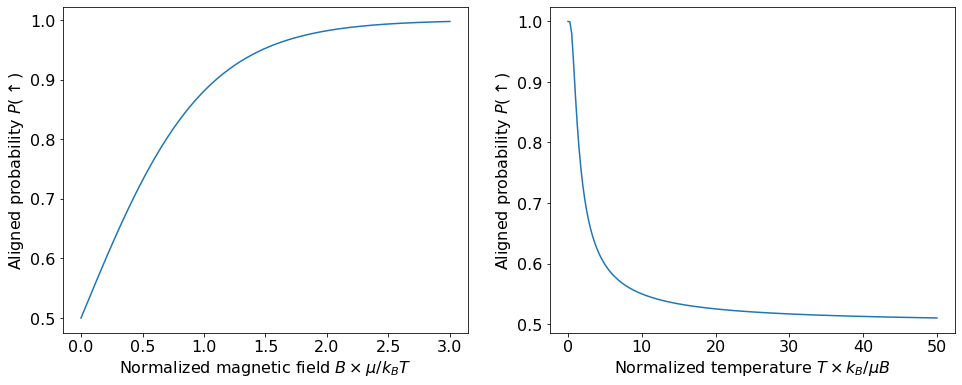

In [21]:
# x values = mu B / k_B T
xvals = numpy.linspace(0,3,200)
plt.subplots(1,2, figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(xvals, numpy.exp(xvals)/(numpy.exp(xvals)+numpy.exp(-xvals)))
plt.xlabel(r'Normalized magnetic field $B \times \mu / k_B T$')
plt.ylabel(r'Aligned probability $P(\uparrow)$')
plt.subplot(1,2,2)
# x values = k_B T / mu B (linear in temperature)
xvals = numpy.linspace(0.01,50,200)
plt.plot(xvals, numpy.exp(1/xvals)/(numpy.exp(1/xvals)+numpy.exp(-1/xvals)))
plt.xlabel(r'Normalized temperature $T \times k_B / \mu B$')
plt.ylabel(r'Aligned probability $P(\uparrow)$')
plt.show()

The left plot tells us that as the magnetic field increases, the probability that the spins are aligned increases towards 1. The _net magnetization_ of the material is zero at $B=0$ and increases as the external magnetic field is made stronger (the material is a *paramagnet*). The right plot tells us that at $\approx$ 0 temperature, the spins are all aligned with the magnetic field, and as the temperature increases the probability that a spin is antialigned increases, though it never quite reaches 50%.  The fact that the system is not in the lowest energy state is ascribed to "thermal fluctuations".

Once more, let's see if the canonical ensemble and the microcanonical ensemble give similar answers for the aligned probability versus energy. To put them on the same axis we will convert energy to temperature using $T = (\partial S/\partial E)^{-1}$.

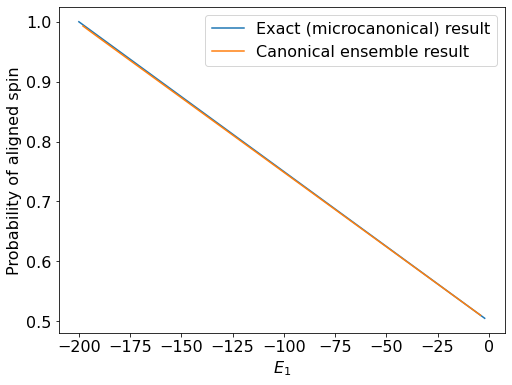

In [30]:
# evaluate temperature by taking numerical derivative of ln omega
def temp(N, E):
    Tinv = (numpy.log(omega(N,E+2))-numpy.log(omega(N,E-2)))/4
    return 1/Tinv

# canonical ensemble probability of spin up given T
# mu B = 1, k_B = 1
def probup(T):
    return numpy.exp(1/T)/(numpy.exp(-1/T)+numpy.exp(1/T))

# energy steps by 2
E = numpy.arange(-N, 0, 2)

# aligned "probability" given energy is just N_up / N
plt.plot(E, ((N-E)/2)/N, label='Exact (microcanonical) result')
plt.plot(E[1:-1], probup(temp(N,E[1:-1])), label='Canonical ensemble result')
plt.xlabel('$E_1$')
plt.ylabel('Probability of aligned spin')
plt.legend()
plt.show()

As a second example, let's consider a single molecule of an ideal gas in a box, in thermal equilibrium with all the other ideal gas molecules which have temperature $T$. The molecule's states are labeled by its position $[x, y, z]$ and its velocity components $[v_x, v_y, v_z]$. 
<!-- From before we count one state per unit box of position $\times$ momentum space, but since velocity is proportional to momentum, we could equivalently count one state per unit box of position $\times$ velocity space. -->
The energy of any state is 

$$ E = \frac{1}{2}m(v_x^2 + v_y^2 + v_z^2) $$

and the canonical ensemble says the probability of seeing any given velocity vector is proportional to

$$
\begin{align*}
P(v_x, v_y, v_z) \propto \exp(-E/k_B T) &= \exp(-mv_x^2/2k_B T - mv_y^2/2k_B T - mv_z^2 /2 k_B T) \\
&= \exp(-mv_x^2/2k_B T)\exp( - mv_y^2/2k_B T)\exp( - mv_z^2 /2 k_B T)
\end{align*}
$$

So, for example, we must have

$$P(v_x) \propto \exp(-mv_x^2/2k_B T)$$

for any given value of $v_y$ and $v_z$. But in our discussion of the Maxwell-Boltzmann distribution from the kinetic theory of gases we saw that we have

$$P(v_x) = \sqrt{\frac{m}{2\pi k_B T}}\exp(-mv_x^2/2 k_B T),$$

which confirms the prediction of the canonical ensemble.

For a slightly more complex version, let's a simple model of the atmosphere, considering gravity.  Molecules of air do fall under gravity, and carry a gravitational potential energy $mgh$. Consider a single molecule of nitrogen in a vertical column of air all at a constant temperature $T$. (This is not necessarily a _great_ model for the atmosphere &mdash; temperature does change with altitude &mdash; but it'll do for now.) The probability that the molecule will be found in any given state will be distributed according to the canonical ensemble.  The states of the particle are labeled by its position in space $[x, y, z]$ and its velocity components $[v_x, v_y, v_z]$. The energy of any state is given by

$$ E = \frac{1}{2}m(v_x^2 + v_y^2 + v_z^2) + mgz$$

The probability of observing a state is proportional to $\exp(-E/k_B T)$:

$$ P(\vec{x}, \vec{v}) \propto \exp\left[-\left(\frac{1}{2}mv^2 + mgz\right)/k_B T\right] = \exp\left(-mv^2/2 k_B T\right) \exp(-mgz/k_B T)$$

This is the product of the Maxwell-Boltzmann distribution ($\exp[-mv^2/2 k_B T]$) and a term that depends on the altitude ($\exp[-mgz/k_B T]$). So the prediction is that we should have an exponentially falling number of molecules as altitude increases; since the temperature is constant, at any altitude the pressure is proportional to the number of molecules per unit volume, and this means the pressure decreases exponentially:

$$ P(z) = P_0 \exp(-mgz/k_B T) $$

(where here $P(z)$ is the pressure at altitude $z$ and $P_0$ is the pressure at $z=0$).  For nitrogen gas at 293 K, the term $mg/k_B T = 0.00011$ m<sup>-1</sup>, meaning the atmospheric pressure goes down to $P_0/e = 0.37 P_0$ for an altitude $z = k_B T/mg = 8.9$ km (roughly the height of Everest above sea level).

Is it _really_ true that the Maxwell-Boltzmann distribution holds even once gravity is turned on? Let's run the ideal gas simulation with gravity added.

In [93]:
SCALING=1
NPARTICLES=int(1000*SCALING)
NDIMS=2 # 2 dimensions
SIZE=numpy.array([10,50]) # size of box
DELTAT=0.1
TEMPSCALE=1
G=-1
masses = numpy.array([1.*(1/SCALING)]*(NPARTICLES))
radii = numpy.array([0.05*(1/SCALING**(1/NDIMS))]*(NPARTICLES))

# Initial conditions
# initialize randomly across entire box
positions = (numpy.random.uniform(-0.5, 0.5, size=(NPARTICLES,NDIMS)))*SIZE
# initialize randomly across left half of box
#positions = (numpy.random.uniform(-0.5, 0., size=(NPARTICLES,NDIMS)))*SIZE

# initialize velocities randomly in both directions (std. dev. magnitude sqrt(NDIMS)*sqrt(TEMP))
velocities = (numpy.random.normal(0, 1, size=(NPARTICLES,NDIMS)))*math.sqrt(TEMPSCALE)
# all particles moving along x with velocity sqrt(NDIMS)
#velocities = numpy.array([[math.sqrt(NDIMS),0]]*NPARTICLES)
# start particle 0 from rest
#velocities[0]=[0,0]

def timestep():
    global positions, velocities
    positions = positions + DELTAT*velocities
    bounce_at_edges()
    velocities[:,-1] += DELTAT*G*numpy.ones(len(velocities))
    bounce_internally(positions, velocities, radii)
            
@numba.jit
def bounce_internally(positions, velocities, radii):
    # find pairs i, j which are closer than the sum of their radii
    # first "colliding" pair terminates search for index i
    for i, ipos in enumerate(positions):
        deltax = ipos-positions[i+1:]
        mindeltar = radii[i]+radii[i+1:]
        deltarsq = numpy.sum(numpy.square(deltax), axis=1)
        hits = numpy.nonzero(deltarsq < mindeltar**2)
        if len(hits[0]): # a collision is happening
            j = i+1+hits[0][0]
            v_cm = (masses[i]*velocities[i]+masses[j]*velocities[j])/(masses[i]+masses[j])
            # now reflect velocity around separation vector
            # project velocity onto separation vector:
            ivelproj = numpy.dot(velocities[i]-v_cm, deltax[hits[0][0]])/deltarsq[hits[0][0]]*deltax[hits[0][0]]
            ideltav = 2*(velocities[i]-v_cm-ivelproj)
            jvelproj = numpy.dot(velocities[j]-v_cm, deltax[hits[0][0]])/deltarsq[hits[0][0]]*deltax[hits[0][0]]
            jdeltav = 2*(velocities[j]-v_cm-jvelproj)
            #print(velocities[i]-v_cm, velocities[j]-v_cm)
            #print(numpy.dot(velocities[i],velocities[i])+numpy.dot(velocities[j],velocities[j]))
            velocities[i]-=ideltav
            velocities[j]-=jdeltav
            #print(masses[i]*numpy.dot(velocities[i],velocities[i])+masses[j]*numpy.dot(velocities[j],velocities[j]))
                            

# what is the momentum being imparted to the particles by the walls at +x and +y ?
impulse_x = []; impulse_y = []
def bounce_at_edges():
    global velocities, positions, impulse_x, impulse_y
    gone_too_far = numpy.abs(positions)//(SIZE/2)
    high_flip = positions//(SIZE/2)
    # impulse delivered by particles at edge
    momenta = masses.reshape((NPARTICLES,1))*velocities
    impulse_x.append(2*numpy.sum(momenta[high_flip[:,0]==1][:,0])/DELTAT/numpy.prod(numpy.delete(SIZE,[0])))
    impulse_y.append(2*numpy.sum(momenta[high_flip[:,1]==1][:,1])/DELTAT/numpy.prod(numpy.delete(SIZE,[1])))
    #posmarker, extrapos = numpy.divmod(positions, (SIZE/2))
    #print(gone_too_far)
    # if we have gone 1, 3, 5, ... times the half-size of the box, reverse velocity in that dimension
    velocities = numpy.where(gone_too_far%2, -velocities, velocities)
    # wrap positions. (assume nothing is so far that it )
    positions=numpy.where(positions>(SIZE/2), SIZE-positions, positions)
    positions=numpy.where(positions<(-SIZE/2), -SIZE-positions, positions)
    if numpy.any(positions>(SIZE/2)) or numpy.any(positions < (-SIZE/2)):
        print("Particle went too fast!")

In [94]:
NFRAMES=5000
pos0 = []
vel0 = []
posall = []
frac_left = []
mean_energy_top = []
mean_energy_bottom = []
impulse_x = []; impulse_y = []
for i in tqdm.notebook.tqdm(range(NFRAMES)):
    timestep()
    pos0.append(positions[0])
    vel0.append(velocities[0])
    posall.append(positions)
    #frac_left.append(numpy.count_nonzero(positions[:,0] < 0)/NPARTICLES)
    mean_energy_bottom.append(0.5*numpy.sum((masses*numpy.square(numpy.linalg.norm(velocities, axis=1)))[positions[:,1] < 0])/numpy.count_nonzero(positions[:,1] < 0))
    mean_energy_top.append(0.5*numpy.sum((masses*numpy.square(numpy.linalg.norm(velocities, axis=1)))[positions[:,1] > 0])/numpy.count_nonzero(positions[:,1] > 0))
pos0 = numpy.array(pos0)
posall = numpy.array(posall)

In [ ]:
NPLOTFRAMES=700
# visualization of the motion of all particles
fig = plt.figure(figsize=(10,8))
ax = []
ax.append(plt.subplot2grid((1,3), (0,0)))
ax.append(plt.subplot2grid((1,3), (0,1), colspan=2))
#fig,ax = plt.subplots(1, 2, figsize=(10,8))
circles = [plt.Circle(posall[0][j], radii[j], color='b' if j == 0 else 'r') for j in range(NPARTICLES)]
for circle in circles:
    ax[0].add_artist(circle)
ax[0].set_aspect('equal')
ax[0].set_xlim(-SIZE[0]/2,SIZE[0]/2)
ax[0].set_ylim(-SIZE[1]/2,SIZE[1]/2)
ax[0].set_ylabel('z')
ax[0].set_xlabel('x')
line1, = ax[1].plot([], [], label='Bottom half')
line2, = ax[1].plot([], [], label='Top half')
plt.legend()
ax[1].set_ylim(0,40)
ax[1].set_xlim(0,NPLOTFRAMES)
ax[1].set_ylabel('Mean kinetic energy')
ax[1].set_xlabel('Time')
plt.tight_layout()

def animate(i):
    for j in range(NPARTICLES):
        circles[j].set_center(posall[i][j])
    line1.set_data(range(i+1), mean_energy_bottom[:i+1])
    line2.set_data(range(i+1), mean_energy_top[:i+1])
    return circles + [line1, line2]

anim = animation.FuncAnimation(fig, animate,
                               frames=NPLOTFRAMES,
                              repeat=False,
                              blit=True)
plt.close()
HTML(anim.to_jshtml(fps=20))

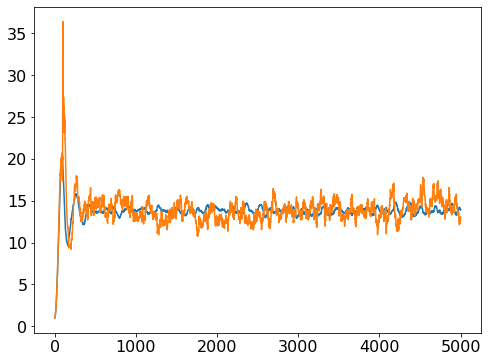

In [103]:
plt.plot(mean_energy_bottom)
plt.plot(mean_energy_top)
plt.show()